# Review Section

## Example

In [62]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime

# Constants
TICKERS = ['MSFT', 'GOOGL']
START_DATE = '2022-01-01'
END_DATE = '2024-06-30'

# Download adjusted close prices for all tickers
adj_prices = yf.download(TICKERS, start=START_DATE, end=END_DATE, progress=False)['Adj Close']
adj_prices.columns.name = None
adj_prices.index.name = 'date'
adj_prices.index = adj_prices.index.map(lambda x: pd.to_datetime(x).date())
adj_prices.dropna(axis=0, inplace=True)
adj_prices

,GOOGL,MSFT
date,,
2022-01-03,144.633362,326.940796
2022-01-04,144.042831,321.334778
2022-01-05,137.434677,308.999390
2022-01-06,137.407257,306.557648
2022-01-07,136.678558,306.713959
...,...,...
2024-06-24,178.982498,446.864594
2024-06-25,183.786118,450.138672
2024-06-26,183.636322,451.346497


### Prices

<Axes: title={'center': 'Stock Prices'}, xlabel='Date', ylabel='Prices'>

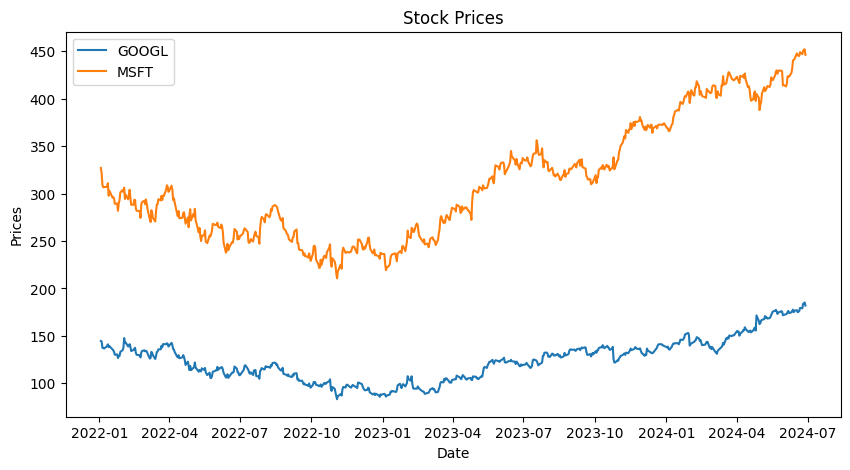

In [63]:
adj_prices.plot(title='Stock Prices', ylabel='Prices', xlabel='Date', figsize=(10, 5))

### Returns

In [64]:
adj_returns = adj_prices.pct_change()
adj_returns.dropna(axis=0, inplace=True)

<Axes: title={'center': 'Stock Returns'}, xlabel='Date', ylabel='Daily Returns'>

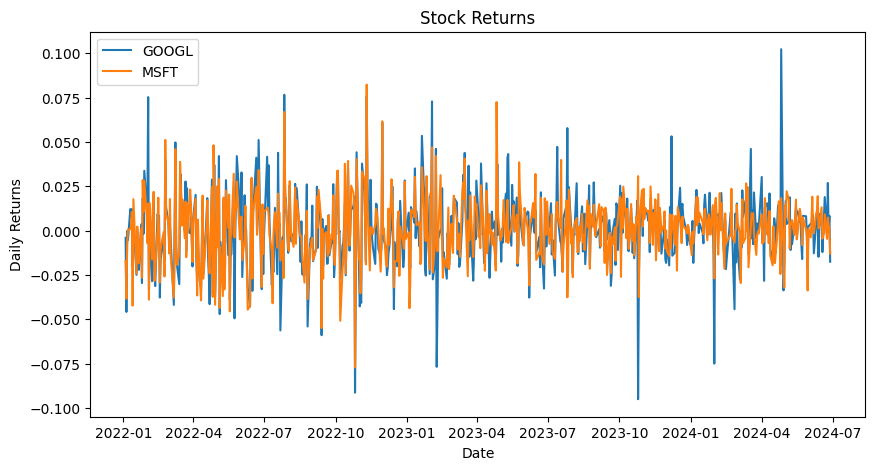

In [65]:
adj_returns.plot(title='Stock Returns', ylabel='Daily Returns', xlabel='Date', figsize=(10, 5))

### Covariances

In [66]:
adj_returns.cov()

,GOOGL,MSFT
GOOGL,0.000450,0.000273
MSFT,0.000273,0.000329


### Correlations

In [67]:
adj_returns.corr()

,GOOGL,MSFT
GOOGL,1.00000,0.70908
MSFT,0.70908,1.00000


### Mean Returns

In [68]:
adj_returns.mean()

GOOGL    0.000592
MSFT     0.000662
dtype: float64

### Volatility

In [69]:
adj_returns.std()

GOOGL    0.021219
MSFT     0.018127
dtype: float64

### Calculation of a Single Pandas Series

In [70]:
adj_returns['GOOGL']

date
2022-01-04   -0.004083
2022-01-05   -0.045876
2022-01-06   -0.000200
2022-01-07   -0.005303
2022-01-10    0.012061
                ...   
2024-06-24   -0.002283
2024-06-25    0.026838
2024-06-26   -0.000815
2024-06-27    0.008321
2024-06-28   -0.017583
Name: GOOGL, Length: 624, dtype: float64

In [71]:
adj_returns['GOOGL'].mean()

np.float64(0.000592342164253753)

In [72]:
adj_returns['GOOGL'].std()

np.float64(0.02121888076348244)

### Annualized Volatility
- Annualize Monthly Volatility multiplying by $\sqrt{12}$
- Annualize Daily Volatility multiplying by $\sqrt{252}$

### Annualized Mean
- Annualize Monthly Mean multiplying by $12$
- Annualize Daily Mean multiplying by $252$

### Annualized Sharpe
- Annualize Monthly Sharpe multiplying by $\sqrt{12}$
- Annualize Daily Sharpe multiplying by $\sqrt{252}$

In [73]:
adj_returns.std() * np.sqrt(252)

GOOGL    0.336839
MSFT     0.287759
dtype: float64

### Portfolio Statistics

In [74]:
WEIGHTS = [.6, .4]

portfolio_adj_returns = WEIGHTS[0] * adj_returns['GOOGL'] + WEIGHTS[1] * adj_returns['MSFT']
portfolio_adj_returns

date
2022-01-04   -0.009309
2022-01-05   -0.042881
2022-01-06   -0.003281
2022-01-07   -0.002978
2022-01-10    0.007529
                ...   
2024-06-24   -0.003246
2024-06-25    0.019034
2024-06-26    0.000584
2024-06-27    0.005603
2024-06-28   -0.015761
Length: 624, dtype: float64

In [75]:
round(portfolio_adj_returns.mean(), 6)

np.float64(0.00062)

In [76]:
round(WEIGHTS[0] * adj_returns['GOOGL'].mean() + WEIGHTS[1] * adj_returns['MSFT'].mean(), 6)

np.float64(0.00062)

# `apply` vs `map` in Pandas

## `map`
- **Used for Series only.**
- Ideal for element-wise transformations or mappings of values.
- Often used for replacing values in a Series based on a dictionary or function.
- **Example Usage**: Replacing values in a column.

    ```python
    import pandas as pd

    s = pd.Series(['cat', 'dog', 'mouse'])
    s.map({'cat': 'kitten', 'dog': 'puppy'})
    # Output: Series(['kitten', 'puppy', 'mouse'])
    ```

## `apply`
- **Used for both Series and DataFrame.**
- Allows applying a function along an axis of the DataFrame (rows or columns).
- More flexible than `map`, as it can be used for operations involving more than simple element-wise mappings.
- **Example Usage**: Applying a function to modify the elements of a DataFrame.

    ```python
    df = pd.DataFrame([[1, 2], [3, 4]], columns=['A', 'B'])
    df['A'].apply(lambda x: x**2)
    # Output: Series([1, 9])
    ```

## When to Use:
- Use **`map`** when you need a simple transformation or replacement on a Series.
- Use **`apply`** when you need to perform complex operations on Series or across a DataFrame.

<Axes: xlabel='date'>

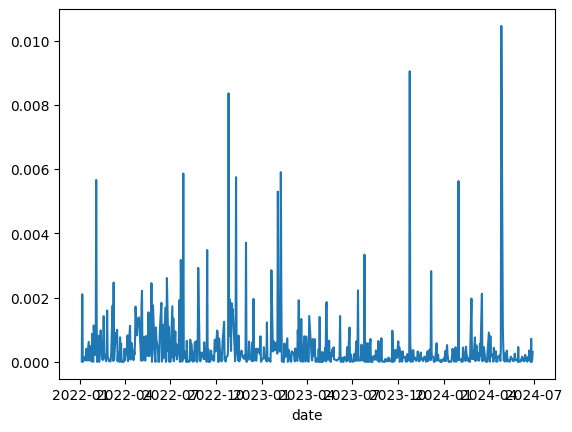

In [77]:
adj_returns['GOOGL'].map(lambda x: x ** 2).plot()

<Axes: xlabel='date'>

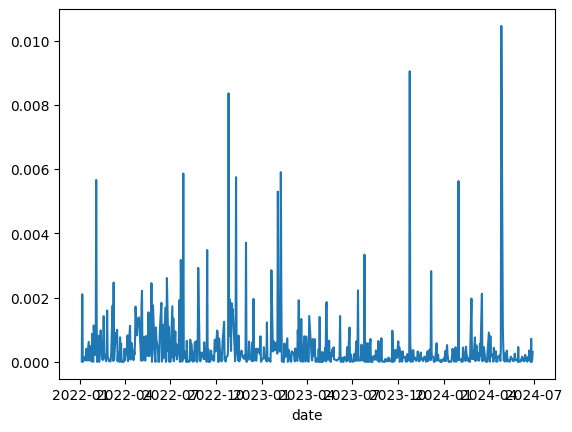

In [78]:
adj_returns['GOOGL'].apply(lambda x: x ** 2).plot()

In [79]:
adj_returns["GOOGL Return Sign"] = adj_returns['GOOGL'].apply(lambda x: "Positve" if x > 0 else "Negative")
adj_returns["GOOGL Return Sign"]

date
2022-01-04    Negative
2022-01-05    Negative
2022-01-06    Negative
2022-01-07    Negative
2022-01-10     Positve
                ...   
2024-06-24    Negative
2024-06-25     Positve
2024-06-26    Negative
2024-06-27     Positve
2024-06-28    Negative
Name: GOOGL Return Sign, Length: 624, dtype: object

In [80]:
adj_returns["GOOGL Return Sign"] = adj_returns['GOOGL'].map(lambda x: "Positve" if x > 0 else "Negative")
adj_returns["GOOGL Return Sign"]

date
2022-01-04    Negative
2022-01-05    Negative
2022-01-06    Negative
2022-01-07    Negative
2022-01-10     Positve
                ...   
2024-06-24    Negative
2024-06-25     Positve
2024-06-26    Negative
2024-06-27     Positve
2024-06-28    Negative
Name: GOOGL Return Sign, Length: 624, dtype: object

### What months have the highest average return?

In [81]:
adj_returns.reset_index(inplace=True)
adj_returns

,date,GOOGL,MSFT,GOOGL Return Sign
0,2022-01-04,-0.004083,-0.017147,Negative
1,2022-01-05,-0.045876,-0.038388,Negative
2,2022-01-06,-0.000200,-0.007902,Negative
3,2022-01-07,-0.005303,0.000510,Negative
4,2022-01-10,0.012061,0.000732,Positve
...,...,...,...,...
619,2024-06-24,-0.002283,-0.004691,Negative
620,2024-06-25,0.026838,0.007327,Positve
621,2024-06-26,-0.000815,0.002683,Negative
622,2024-06-27,0.008321,0.001526,Positve


In [82]:
adj_returns['formatted_date'] = adj_returns['date'].map(lambda x: x.strftime("%Y-%b"))
adj_returns

,date,GOOGL,MSFT,GOOGL Return Sign,formatted_date
0,2022-01-04,-0.004083,-0.017147,Negative,2022-Jan
1,2022-01-05,-0.045876,-0.038388,Negative,2022-Jan
2,2022-01-06,-0.000200,-0.007902,Negative,2022-Jan
3,2022-01-07,-0.005303,0.000510,Negative,2022-Jan
4,2022-01-10,0.012061,0.000732,Positve,2022-Jan
...,...,...,...,...,...
619,2024-06-24,-0.002283,-0.004691,Negative,2024-Jun
620,2024-06-25,0.026838,0.007327,Positve,2024-Jun
621,2024-06-26,-0.000815,0.002683,Negative,2024-Jun
622,2024-06-27,0.008321,0.001526,Positve,2024-Jun


In [86]:
adj_returns.groupby("formatted_date")[['GOOGL']].mean().sort_values("GOOGL", ascending=False)

,GOOGL
formatted_date,
2023-Mar,0.006345
2023-May,0.006303
2023-Jan,0.005901
2023-Jul,0.005374
2024-Mar,0.004448
2024-Apr,0.003789
2022-Jul,0.003704
2022-Nov,0.003616
2023-Nov,0.003205
